# **Hepatitis C Prediction using a Support Vector Machine (SVM) Model**

## By Lukas Jenkins

## Introduction

In this project, I will use a freely available patient dataset (https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) to develop a SVM model that can predict hepatitis C infection and the severity of disease progression (hepatitis C, liver fibrosis, or liver cirrhosis). 

## Importing Data and Removing Missing Values

First, import the data using Pandas and assign it to a variable. Inspect the dataset to get a feel for the attributes and organization of the patient's health data.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/luke/Desktop/Coding Projects/Kaggle Datasets/Health Data/HepatitisCdata.csv')

df.head(n=10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


Next, call the Pandas .info() method to inspect the data types and check for null values.

In [2]:
# Drop the column labeling each patient; it is unnecessary because Pandas dataframes have built-in indices
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


The number of non-null counts is not consistent across all columns, so there must be missing values. If we used .dropna() to remove all rows containing nulls, at most we would lose 5% of the total rows (the case in which all nulls were in different rows).

In [3]:
# Drop rows with null values and reset the dataframe index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 59.9+ KB


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

The non-null count is consistent across rows, and we only lost 4% of our rows using .dropna(). We can confirm there are no nulls by calling the sum of the .isnull() method for each column and check that every value is 0. Note: It is essential to reset the index of the dataframe to avoid problems later on because .dropna() alters the dataframe index. 

## Data Exploration and Preprocessing for Machine Learning

We can generate a correlation matrix to visualize feature correlations. I like to use the color palette "icefire" because it is both aesthetically pleasing and makes trends easy to spot; positive correlations will be fiery, and negative correlations will be icy. I also chose to only show half of the matrix because it is symetrical along the diagonal, and this simplifies interpretation by removing duplicate information.

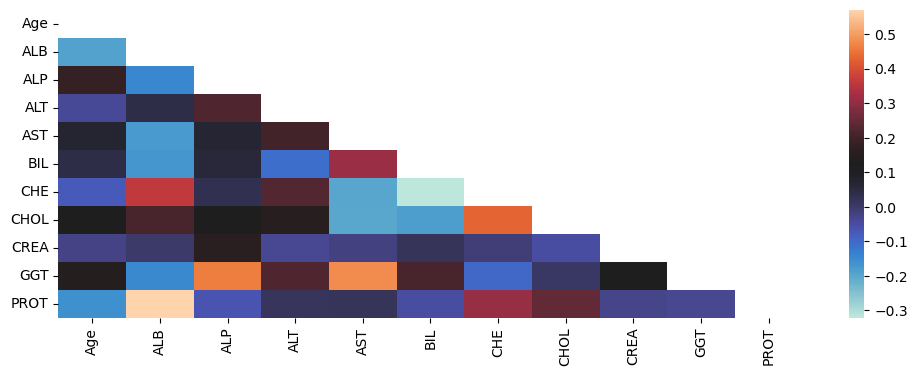

In [4]:
# Create a correlation matrix
corr_matrix = df.corr()

# Make it pretty 
upper_triangle = np.zeros_like(corr_matrix, dtype=bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.heatmap(corr_matrix, mask=upper_triangle, cmap='icefire')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)
plt.show()

The strongest correlation appears to be between ALB and PROT having a moderate positive correlation. Meanwhile, the strongest negative correlation is between BIL and CHE, but it is only around a modest -0.3. The rest of the variables seem to be weakly correlated in general, so it shouldn't be necessary to implement feature engineering to remove unnecessary information from the dataset.

The next step is to encode categorical data so that it can be represented numerically. Machine learning models can only be trained on numerical data, so this is an essential step.

In [5]:
from sklearn.preprocessing import LabelEncoder

cat_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

# Transform the categorical data into numbers
df['Category'] = cat_encoder.fit_transform(df['Category']) 
df['Sex'] = sex_encoder.fit_transform(df['Sex'])

# Create dictionaries to be used as legends
cat_encoder_dict = {value: index for index, value in enumerate(cat_encoder.classes_)}
print('Disease category legend: ', cat_encoder_dict)

sex_encoder_dict = {value: index for index, value in enumerate(sex_encoder.classes_)} 
print('Sex legend: ', sex_encoder_dict)

df.head()

Disease category legend:  {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}
Sex legend:  {'f': 0, 'm': 1}


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Now that the categorical data has been encoded, let's check the distribution of the machine learning target variable which is the Category column. 

Disease category legend:  {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}
0    526
4     24
2     20
3     12
1      7
Name: Category, dtype: int64


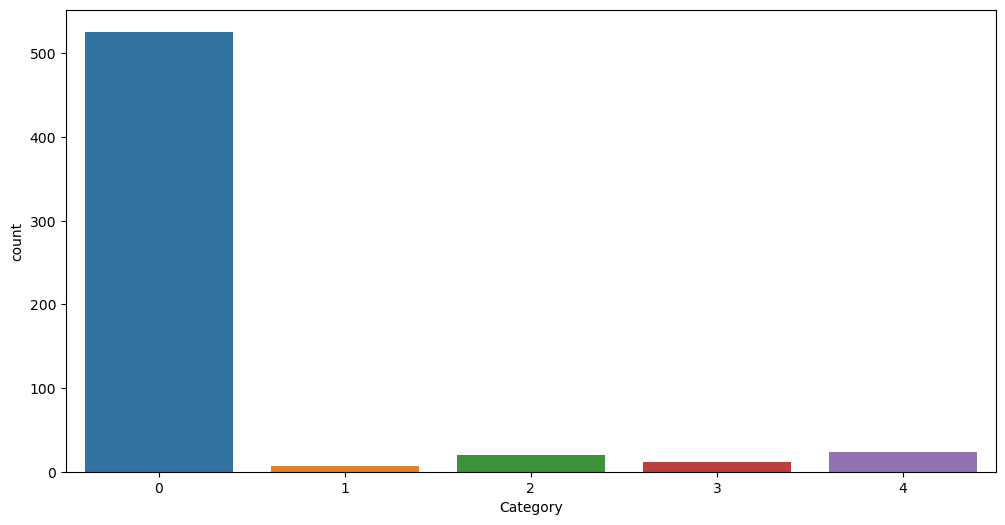

In [6]:
# Create a count plot for the Category column
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df)

print('Disease category legend: ', cat_encoder_dict)

print(df['Category'].value_counts())

The category counts are skewed such that 89% of patients in the dataset are healthy blood donors. The three disease categories make up only 7% of the dataset which is not ideal for training our model; however, with so few samples in the disease categories, there is nothing we can do. We will have to proceed with the data at hand, so it will be essential to specify that we want our y data stratified during the train test split. 

If this data were taken from a real hospital I worked for, I would have access to more data and would prepare a dataset that has balanced proportions of healthy and diseased patient information. 

The next step is to inspect the numerical data and check the distributions to see if any columns are skewed and require transformation.

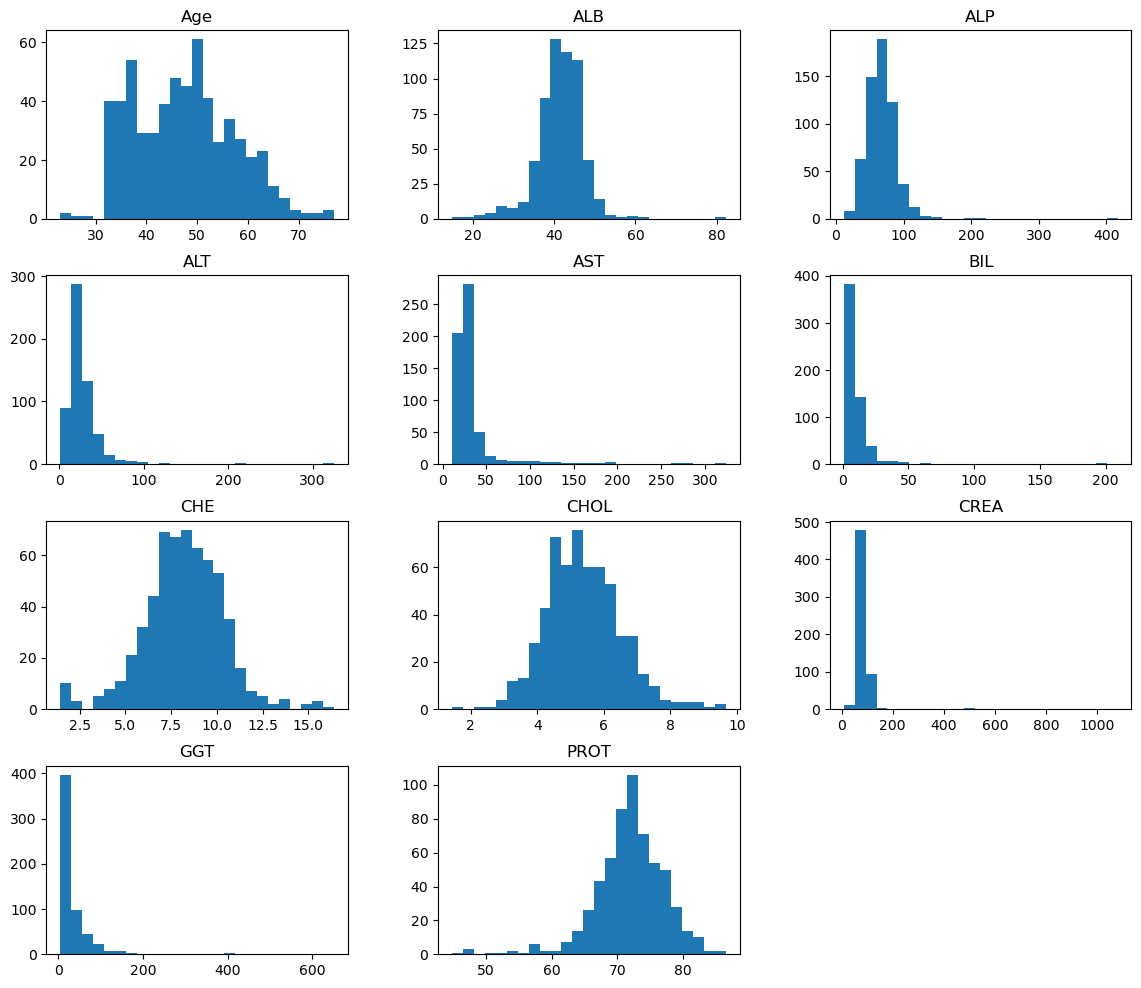

Skewness of 'Age': 0.2858
Skewness of 'ALB': -0.1020
Skewness of 'ALP': 4.7447
Skewness of 'ALT': 6.7986
Skewness of 'AST': 5.2332
Skewness of 'BIL': 8.0687
Skewness of 'CHE': -0.0670
Skewness of 'CHOL': 0.3778
Skewness of 'CREA': 14.9171
Skewness of 'GGT': 5.9218
Skewness of 'PROT': -1.0592


In [7]:
# Define a new dataframe with only the numerical data
attributes = df.drop(['Category', 'Sex'], axis=1)

# Create a grid of histograms
attributes.hist(figsize=(14,12),bins=25,grid=False)

# Show the plots
plt.show()

from scipy.stats import skew

for column in attributes.columns:
    skewness = skew(attributes[column])
    print(f"Skewness of '{column}': {skewness:.4f}")


The skewness for most attributes returned greater than 1 or less than -1, suggesting that they may benefit from a transformation. The followoing code applies a log transform to each column with an absolute value of skewness greater than 1. Without this transformation, the machine learning algorithm may be biased by the skewness of these columns. 

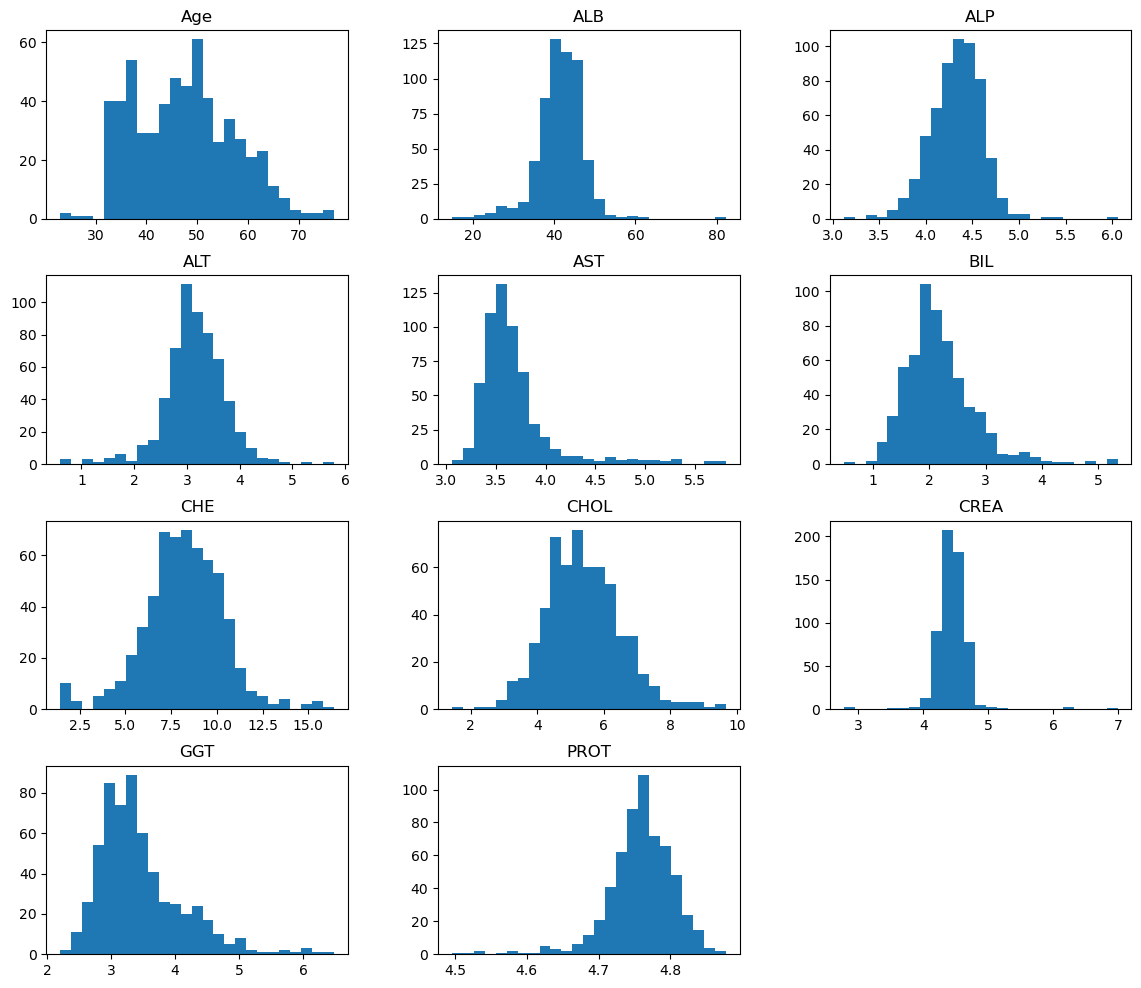

In [8]:
for column in attributes.columns:
    skewness = skew(attributes[column])
    if abs(skewness) > 1.0:
        constant = np.abs(np.min(attributes[column])) + 0.01 # Do this to avoid doing log on 0 or negative values
        attributes[column] = np.log(attributes[column] + constant)
        
# Create a grid of histograms
attributes.hist(figsize=(14,12),bins=25,grid=False)
plt.show()

Now that the appropriate columns have undergone log transformation, it is time to apply StandardScaler to each column to normalize the mean and variance of each attribute. SVM models are sensitive to columns with mismatched data ranges, so applying StandardScaler levels the playing field, so to speak. StandardScaler does not alter the shape of data distributions, so it was important to apply the log transform separately. 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ALB'}>,
        <AxesSubplot:title={'center':'ALP'}>],
       [<AxesSubplot:title={'center':'ALT'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BIL'}>],
       [<AxesSubplot:title={'center':'CHE'}>,
        <AxesSubplot:title={'center':'CHOL'}>,
        <AxesSubplot:title={'center':'CREA'}>],
       [<AxesSubplot:title={'center':'GGT'}>,
        <AxesSubplot:title={'center':'PROT'}>, <AxesSubplot:>]],
      dtype=object)

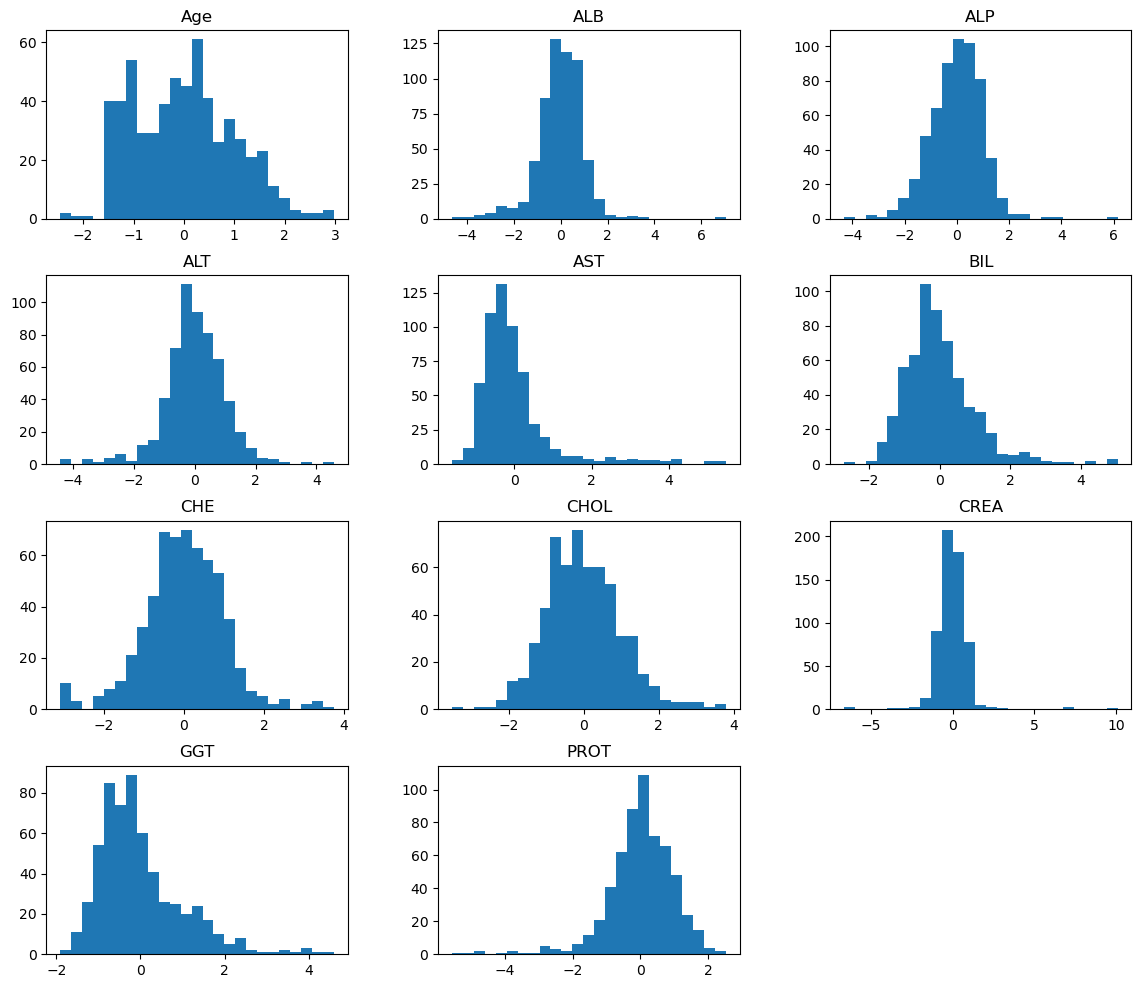

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(attributes)

# StandardScaler returns a numpy array, but a Pandas df is needed to plot histograms
normalized_attributes = pd.DataFrame(normalized_data, columns=attributes.columns) 

# Replot histograms now that data has been scaled
normalized_attributes.hist(figsize=(14,12),bins=25,grid=False)

## Training the SVM Model and Results

Now that our data has been cleaned and peprocessed, it is time to run our SVM model. There are multiple options for SVM kernels built into scikit-learn, so performing a grid search using cross validation is an efficient way to quickly get an estimate of the best kernel and hyperparameters to use.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

x = pd.concat([normalized_attributes, df['Sex']], axis=1) # Adding back the sex column; this is the step resetting the index was important for

y = df['Category']

model = SVC()

grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.25, 0.5, 0.75, 1.0],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, verbose=1)
grid_search.fit(x,y)
print(grid_search.best_score_)
print(grid_search.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
0.9626394321309576
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


The grid search returned that the rbf kernel with C=10 and gamma=0.01 will yield the best accuracy. Finally, we can split our data into training and testing sets (making sure to stratify the categories) and fit our model. 

Cross validation showed a mean accuracy score of: 0.9626
 
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       526
           1       1.00      0.43      0.60         7
           2       0.63      0.60      0.62        20
           3       0.50      0.50      0.50        12
           4       0.91      0.88      0.89        24

    accuracy                           0.96       589
   macro avg       0.81      0.68      0.72       589
weighted avg       0.96      0.96      0.96       589



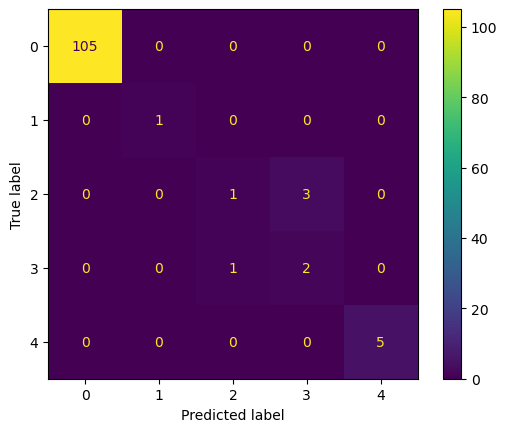

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

model = SVC(kernel='rbf',C=10,gamma=0.01)
model.fit(x,y)

cross_val_mean = cross_val_score(model, x, y, cv=5).mean()
print(f"Cross validation showed a mean accuracy score of: {cross_val_mean:.4f}")
print(" ")

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

predict = cross_val_predict(estimator = model, X = x, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))
cmd.from_estimator(model, x_test, y_test)

The mean accuracy of the overall model is 96%! I am proud of this score because it is one of the best I saw out of people who posted their code for this dataset on Kaggle. This dataset is tricky due to the extremely low proportion of patients that are in the disease category. However, the model was still able to predict which patients were diseased just based on their age, sex, and some lab results. 

Regarding disease diagnosis, it is often said that recall is the most important accuracy score because it captures the sensitivity of the diagnostic test; it represents how well the model is able to identify positive samples. While precision tells us how accurate the model's positive predictions are, recall tells us how likely the model is to accidentally miss a positive diagnosis. Clinicians would much rather accidentally diagnose a healthy patient only to confirm they are fine with additional testing than accidentally miss a diagnosis resulting in that patient not receiving care. In the most serious of cases--liver cirrhosis--the model performed with 0.88 recall and 0.91 precision. Interestingly, the model was better at identifying hepatitis patients than liver fibrosis patients even though liver fibrosis is a worse disease state. 

Overall, this project shows the power of employing SVM machine learning models to predict disease states given structured patient data. Even though the patient dataset was highly imbalanced, the model performed remarkably well for what it was given! In a real hospital, a similar model could be trained on much better datasets which could lead to game-changing medical services that automatically send clinicians a notification if a patient's bloodwork tells the model that they may have a disease. I hope to one day be able to help incorporate this possibility into the standard of care :)